# Pymaceuticals Inc.
---
### Analysis

- [Analysis here]
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
MouseMetadata = pd.read_csv(mouse_metadata_path)
StudyResults = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
MainDF = pd.merge(MouseMetadata, StudyResults, how = "left", on = "Mouse ID")

# Display the data table for preview
MainDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(MainDF.loc[:,"Mouse ID"].unique())

print(f"There are {number_of_mice} mice in the study")

There are 249 mice in the study


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# This tells us which are duplicates
MainDF.duplicated(subset = ["Mouse ID", "Timepoint"])

# Return the rows that are duplicates
MainDF[MainDF.duplicated(subset = ["Mouse ID", "Timepoint"])]
MainDF.loc[MainDF.duplicated(subset = ["Mouse ID", "Timepoint"])]


# Return the unique Mouse ID that contains duplicates
duplicated_mouse_ids = MainDF[MainDF.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicated_mouse_ids


array(['g989'], dtype=object)

In [4]:
# All the data for the duplicated mouse ids
DuplicatedMouseDF = MainDF[MainDF["Mouse ID"] == "g989"]
DuplicatedMouseDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean data frame by dropping the duplicate mouse by its ID.
CleanedMainDF = MainDF[MainDF["Mouse ID"].isin(duplicated_mouse_ids) == False]
CleanedMainDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = len(CleanedMainDF["Mouse ID"].unique())
print(f"The number of mice in the cleaned data frame is {number_of_mice_cleaned}.")

The number of mice in the cleaned data frame is 248.


## Summary Statistics

In [7]:
CleanedMainDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

average_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").var()["Tumor Volume (mm3)"]
sd_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").std()["Tumor Volume (mm3)"]
sd_error_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").sem()["Tumor Volume (mm3)"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_1471/861894096.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_1471/861894096.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume = CleanedMainDF.groupby(by = "Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_1471/861894096.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. I

In [9]:
CleanedMainDF_Summary = pd.DataFrame(
    {
        "Mean Tumor Volume": average_tumor_volume,
        "Median Tumor Volume": median_tumor_volume,
        "Tumor Volume Variance": variance_tumor_volume,
        "Tumor Volume Std. Dev.": sd_tumor_volume,
        "Tumor Volume Std Error": sd_error_tumor_volume
    }
)

CleanedMainDF_Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
CleanedMainDF.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
# Prepare our data for bar graphs

# Colors to use for bar graphs

light_blue = "#50d0fb"

# Series data for bar plots

DrugCountSeries = CleanedMainDF.groupby(by = "Drug Regimen").count()["Timepoint"]
DrugCountSeries = DrugCountSeries.sort_values(ascending = False)

# Let's first extract our data from the series object into two lists
drug_list = list(DrugCountSeries.index)
drug_counts = list(DrugCountSeries)

# Create a data frame from our lists
DrugCountDF = pd.DataFrame(
    {
        "drugs": drug_list,
        "counts": drug_counts
    }
)


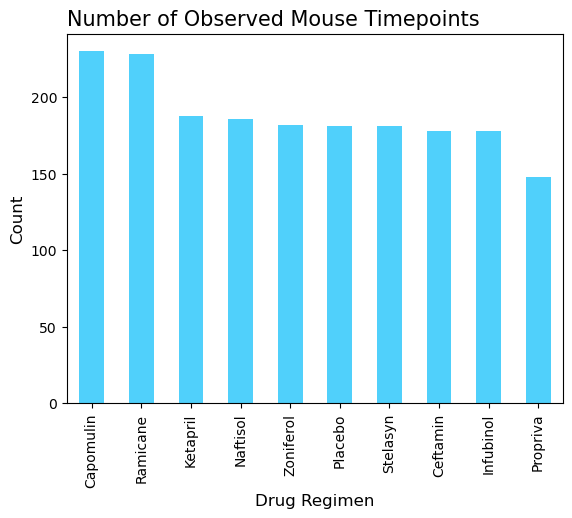

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

BarPlot1 = DrugCountDF.plot(kind = "bar",   
                            x = "drugs",
                            y = "counts",
                            color = light_blue)

BarPlot1.set_ylabel("Count", fontsize = 12)
BarPlot1.set_xlabel("Drug Regimen", fontsize = 12)
BarPlot1.set_title("Number of Observed Mouse Timepoints", fontsize = 15, loc = "left")
BarPlot1.get_legend().remove()

plt.show()

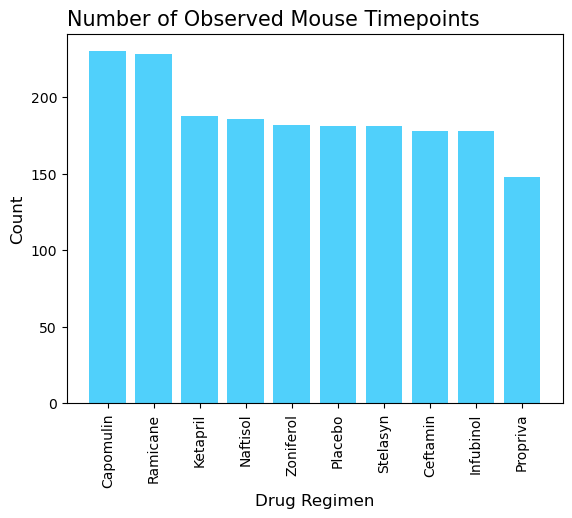

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Method 1: Using two lists to plot

plt.bar(x = drug_list, height = drug_counts, color = light_blue)
plt.title("Number of Observed Mouse Timepoints", fontsize = 15, loc = "left")
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()


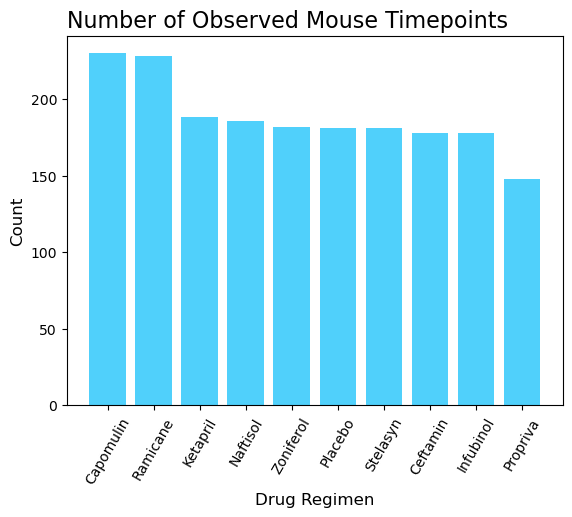

In [28]:
# Method 2: Using a data frame to plot

plt.bar(data = DrugCountDF, x = "drugs", height = "counts", color = light_blue)
plt.title("Number of Observed Mouse Timepoints", fontsize = 16, loc = "left")
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 60)
plt.show()

In [84]:
# Prepare our data for bar graphs

# Colors to use for bar graphs

light_pink = "#ECA5C4"
light_green = "#A5ECCD"

# Series data for pie charts

MouseSexSeries = CleanedMainDF.groupby(by = "Sex").count()["Mouse ID"]

# Extract data from series into a list format

sex_list = list(MouseSexSeries.index) 
sex_count = list(MouseSexSeries)

# Create data frame

MouseSexDF = pd.DataFrame(
    {
        "Sex": sex_list,
        "Count": sex_count
    }
)

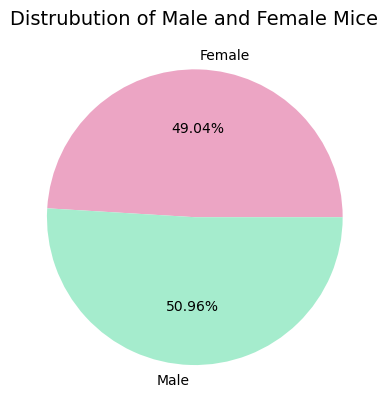

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

PieChart1 = MouseSexDF.plot(kind = "pie",
                            y = "Count",
                            labels = MouseSexDF["Sex"],
                            autopct = "%.2f%%",
                            colors = [light_pink, light_green]
                            )
PieChart1.get_legend().remove()
PieChart1.set_ylabel("")
PieChart1.set_title("Distrubution of Male and Female Mice", fontsize = 14, loc = "left")
plt.show()

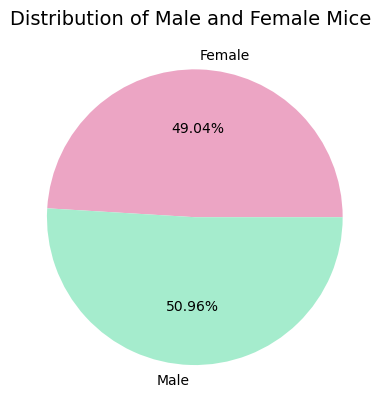

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(MouseSexDF["Count"],
        labels = MouseSexDF["Sex"],
        autopct = "%.2f%%",
        colors = [light_pink, light_green])
plt.title("Distribution of Male and Female Mice", fontsize = 14, loc = "left")
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
CleanedMainDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


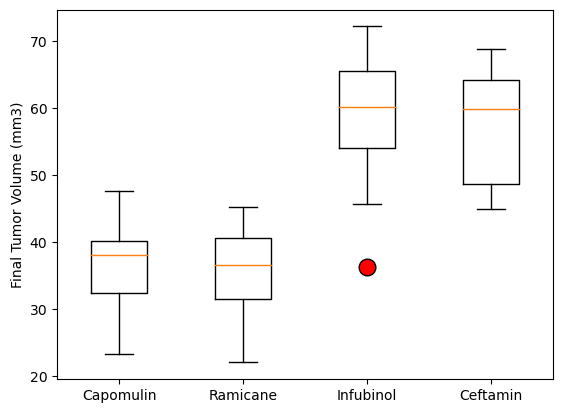

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

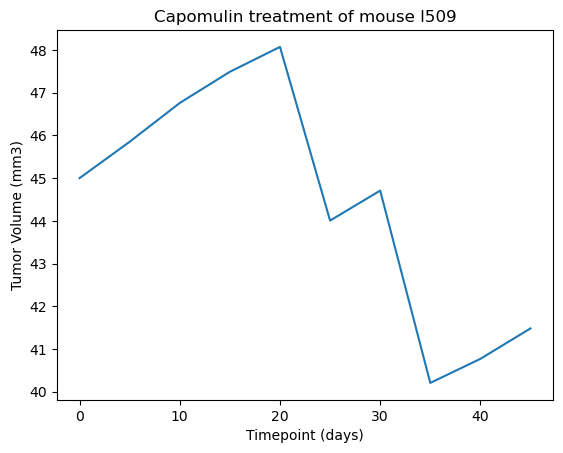

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


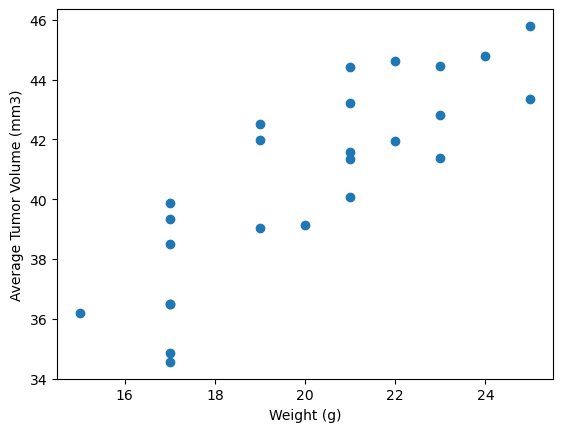

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


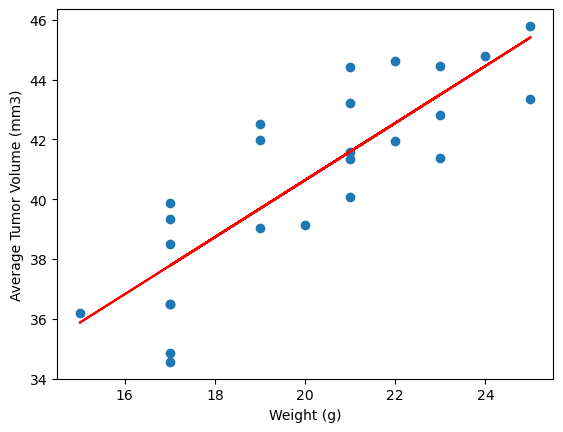

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
